**Import Packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
visa_df = pd.read_csv(r'C:\Users\LEGION\OneDrive\Documents\Naresh IT\Datafiles\Visadataset.csv')
visa_df.head(2)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified


**Box Plot**

- is used to detect outliers
- box plot has min q1 value q2 middle value and max q3 value
- in Box plot red line represents median which is 50 percentile of data

**Outlier**

- very very huge observation
- very very small observation
- which pulls the data to any side of the distribution
-  Mild Outliers
    - Q1 - 1.5 \* IQR and Q3 + 1.5 \* IQR
- Strong Outliers
    - Q1 - 3 \* IQR and Q3 + 1.5 \* IQR
- IQR (Inter Quartile Range)
    - Q3 - Q1
- q1: 25p
- q2: 50p
- q3: 75p

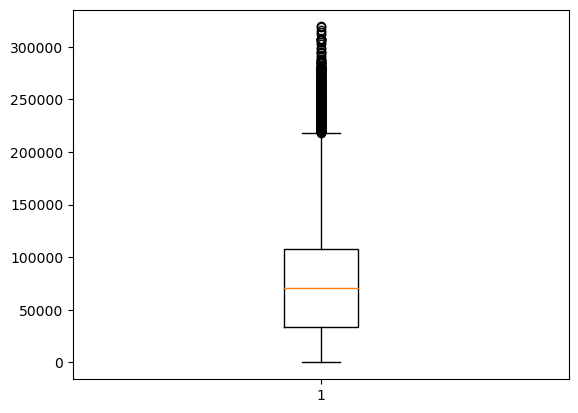

In [3]:
plt.boxplot(visa_df['prevailing_wage'])
plt.show()


          Q1-1.5IQR   Q1   median  Q3   Q3+1.5IQR
                       |-----:-----|
       o      |--------|     :     |--------|    o  o
                       |-----:-----|
     flier             <----------->            fliers

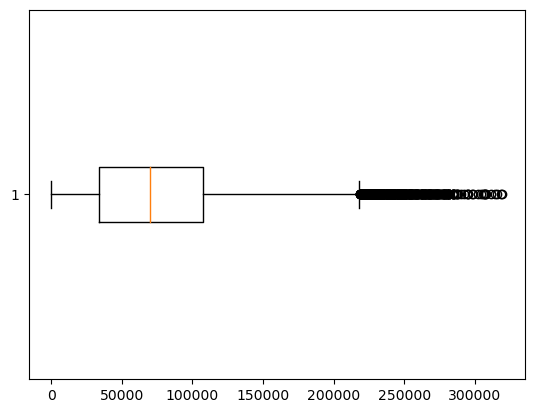

In [4]:
plt.boxplot(visa_df['prevailing_wage'], vert=False)
plt.show()

**Box Plot using Seaborn**

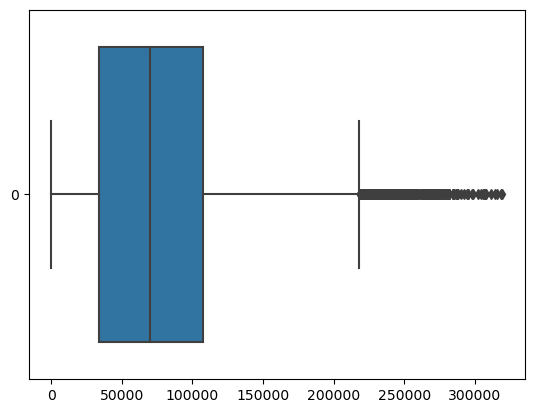

In [5]:
sns.boxplot(visa_df['prevailing_wage'], orient="h")
plt.show()

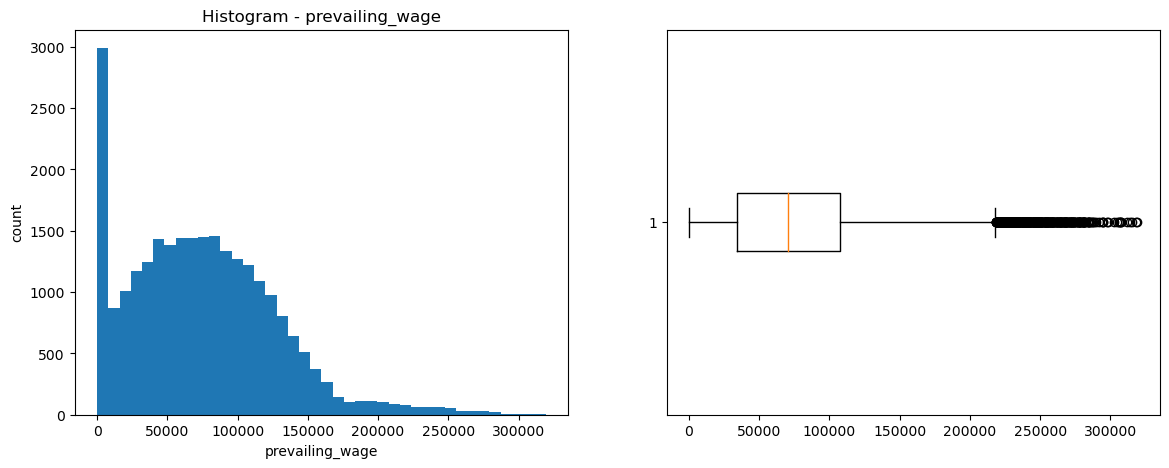

In [6]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.hist(visa_df['prevailing_wage'], bins=40)
plt.title("Histogram - prevailing_wage")
plt.xlabel('prevailing_wage')
plt.ylabel('count')

plt.subplot(1, 2, 2)
plt.boxplot(visa_df['prevailing_wage'], vert=False)
plt.show()

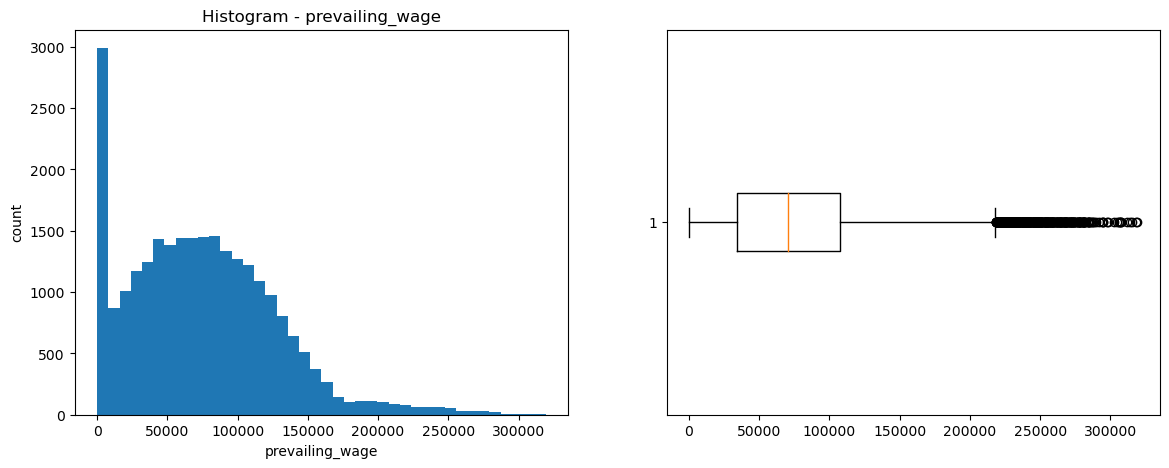

In [7]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1).hist(visa_df['prevailing_wage'], bins=40)
plt.title("Histogram - prevailing_wage")
plt.xlabel('prevailing_wage')
plt.ylabel('count')

plt.subplot(1, 2, 2).boxplot(visa_df['prevailing_wage'], vert=False)
plt.show()

**Outlier Analysis:** Finding the outliers

- Outliers are available less than Q1 - 1.5 \* IQR
- Outliers are available greater than Q3 + 1.5 \* IQR
- Step1:
    - Calculate Q1 value : 25p
    - Calculate Q3 value : 75p
    - Calculate IQR: Q3 - Q1 value
- Step2:
    - LB= Q1 - 1.5 \* IQR
    - UB= Q3 + 1.5 \* IQR
- Step3:
    - con1: visa_df['prevailing_wage'] < LB
    - con2: visa_df['prevailing_wage'] > UB
    - Apply OR operator and get outliers data

**Outliers Data**

In [8]:
Q1 = np.percentile(visa_df['prevailing_wage'], 25)
Q3 = np.percentile(visa_df['prevailing_wage'], 75)

IQR = Q3 - Q1
LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR

con1 = visa_df['prevailing_wage'] < LB
con2 = visa_df['prevailing_wage'] > UB

outliers_data = visa_df[con1 | con2]

len(outliers_data)

427

**Non Outliers Data**

In [9]:
Q1 = np.percentile(visa_df['prevailing_wage'], 25)
Q3 = np.percentile(visa_df['prevailing_wage'], 75)

IQR = Q3 - Q1
LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR

con1 = visa_df['prevailing_wage'] > LB
con2 = visa_df['prevailing_wage'] < UB

non_outliers_data = visa_df[con1 & con2]

len(non_outliers_data)

25053

In [10]:
25053 + 427

25480

**Histogram and box polt for non outliers data**

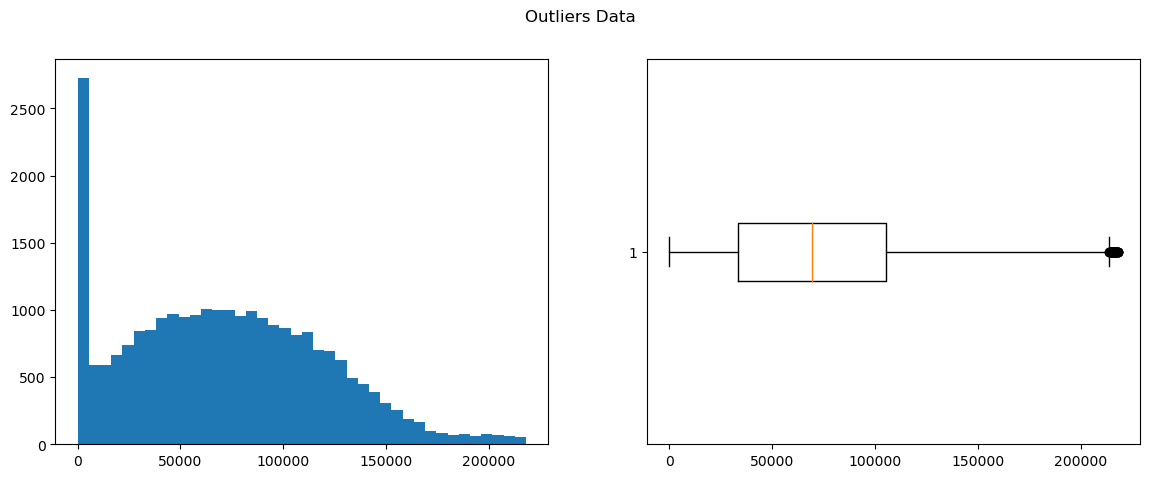

In [11]:
plt.figure(figsize=(14, 5))
plt.suptitle("Outliers Data")
plt.subplot(1, 2, 1).hist(non_outliers_data['prevailing_wage'], bins=40)
plt.subplot(1, 2, 2).boxplot(non_outliers_data['prevailing_wage'], vert=False)
plt.show()

**Compairing non outliers data with completer data**

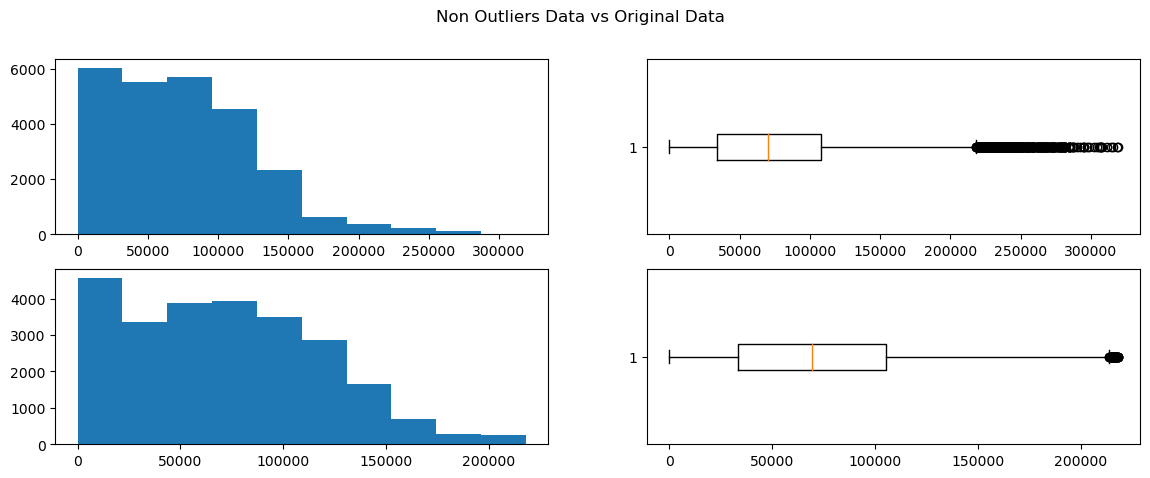

In [12]:
plt.figure(figsize=(14, 5)) # 14 units in x axis and 5 units in yaxis
plt.suptitle("Non Outliers Data vs Original Data")

plt.subplot(2, 2, 1).hist(visa_df['prevailing_wage']) # 25480
plt.subplot(2, 2, 2).boxplot(visa_df['prevailing_wage'], vert=False) # 25480

plt.subplot(2, 2, 3).hist(non_outliers_data['prevailing_wage']) # 25053
plt.subplot(2, 2, 4).boxplot(non_outliers_data['prevailing_wage'], vert=False) # 25053

plt.show()

**Comparison in same plot**

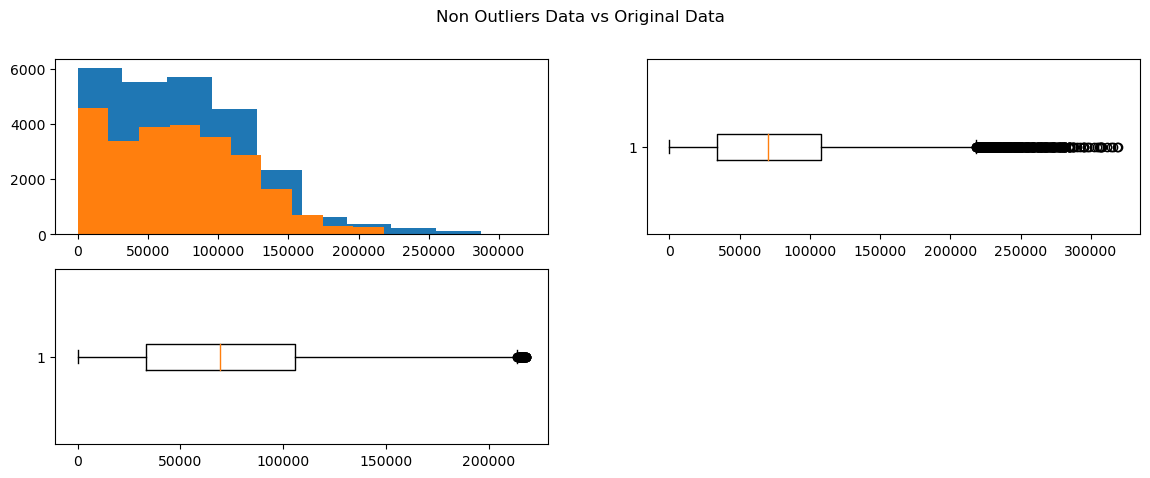

In [13]:
plt.figure(figsize=(14, 5)) # 14 units in x axis and 5 units in yaxis
plt.suptitle("Non Outliers Data vs Original Data")

plt.subplot(2, 2, 1).hist(visa_df['prevailing_wage']) # 25480
plt.subplot(2, 2, 1).hist(non_outliers_data['prevailing_wage']) # 25053


plt.subplot(2, 2, 2).boxplot(visa_df['prevailing_wage'], vert=False) # 25480
plt.subplot(2, 2, 3).boxplot(non_outliers_data['prevailing_wage'], vert=False) # 25053


plt.show()

**How to deal the outliers**

**Method-1: (Drop the outliers)**
- Drop the outliers is not a good idea
- when we drop the outlier entire row will be removed, so data loss happens
- For example here we are droping 427 rows
- So 427 is 1.7% of data out of 25480 rows
- here it is fine to drop the outlier as it is less than 2%

**Method-2: (Fill with Median value)**
- We already know that outliers doesn't affect the median
- so we can fill outliers with median

**Method-3: (Cap the value with Q1 and Q3)**
- All less than lower bound values, we can replace with q1 or LB
- All greater than upper bound values, we can replace with q3 or UB

**Fill with median**

- create empty list
- calculate median value: visa_df['prevailing_wage'].median()
- iterate visa_df['prevailing_wage'].values
- if each value < lb or >ub then append with median values
- else append with i value

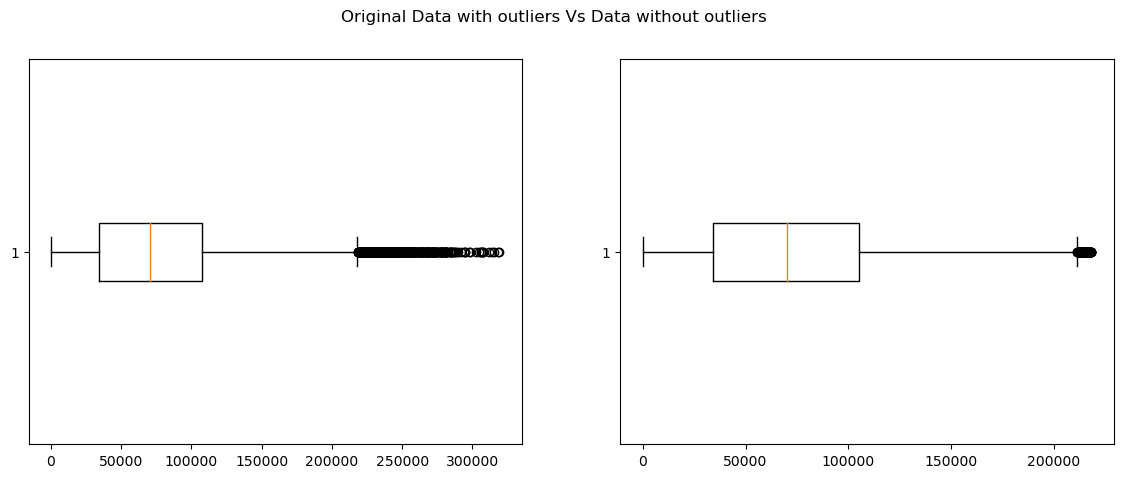

In [19]:
l1 = []
median = visa_df['prevailing_wage'].median()

Q1 = np.percentile(visa_df['prevailing_wage'], 25)
Q3 = np.percentile(visa_df['prevailing_wage'], 75)

IQR = Q3 - Q1
LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR


for value in visa_df['prevailing_wage'].values:
    if value  < LB or value > UB:
        l1.append(median)
    else:
        l1.append(value)
        
visa_df_copy = visa_df.copy()
visa_df_copy['prevailing_wage'] = l1

plt.figure(figsize=(14, 5))
plt.suptitle("Original Data with outliers Vs Data without outliers")
plt.subplot(1, 2, 1).boxplot(visa_df['prevailing_wage'], vert=False)
plt.subplot(1, 2, 2).boxplot(visa_df_copy['prevailing_wage'], vert=False)
plt.show()

**np.where()**

- np.where() is used for binary condition
- It has 3 arguments
    - condition
    - value if condition is True
    - another value if condition is False

In [24]:
d = {"Sub":["DS", "ML", "CS"], "Marks":[100, 150, 20]}
data = pd.DataFrame(d)

# Marks column value replace with 1 when value > 100
# else column value
# Marks Marks
#    100  100
#    150   1
#     20   20

In [25]:
con = data['Marks'] > 100
l = np.where(con, 1, data["Marks"])
# If condition True then replace with 1
# If condition is False then replace with data['Marks']
l

array([100,   1,  20], dtype=int64)

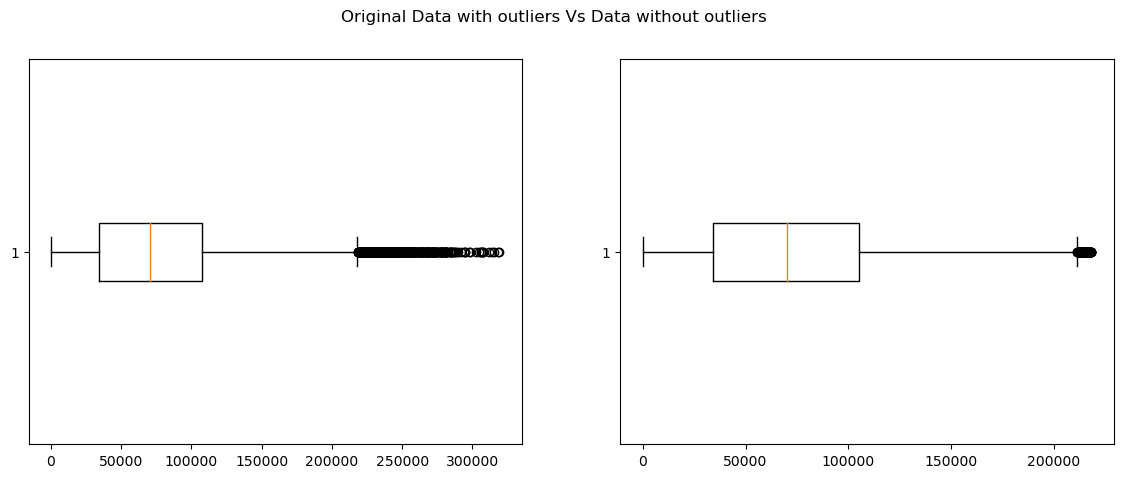

In [33]:
median = visa_df['prevailing_wage'].median()

Q1 = np.percentile(visa_df['prevailing_wage'], 25)
Q3 = np.percentile(visa_df['prevailing_wage'], 75)

IQR = Q3 - Q1
LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR

con1 = visa_df['prevailing_wage'] < LB
con2 =  visa_df['prevailing_wage'] > UB
con = con1 | con2
newData = np.where(con, median, visa_df['prevailing_wage'])

visa_df_copy = visa_df.copy()
visa_df_copy['prevailing_wage'] = newData

plt.figure(figsize=(14, 5))
plt.suptitle("Original Data with outliers Vs Data without outliers")
plt.subplot(1, 2, 1).boxplot(visa_df['prevailing_wage'], vert=False)
plt.subplot(1, 2, 2).boxplot(visa_df_copy['prevailing_wage'], vert=False)
plt.show()